# Análise de Séries Temporais: Dados Spotify

A etapa de análise exploratória dos dados se inicia com a leitura dos dados e seus primeiros tratamentos. Quando se trata de uma análise em séries temporais, é primordial se certificar de que nossa variável de tempo corresponde com o tipo datetime.

In [3]:
#! pip install pandas

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("TaylorSwift_spotify_chart.csv")

A função `head()` nos mostra as primeiras cinco linhas do dataframe e nos fornece um visual resumido de como a base é estruturada.

In [6]:
df.head()

,week,song_count,artist_name
0,2020-01-02,2,Taylor Swift
1,2020-01-09,1,Taylor Swift
2,2020-01-23,0,Taylor Swift
3,2020-02-06,3,Taylor Swift
4,2020-02-13,2,Taylor Swift


O uso de `info()` é útil para indicar o tipo das colunas e se há existência de valores nulos na base. O mais importante nessa etapa é se certificar de não há valores nulos em nenhuma das colunas e que a coluna de data está devidamente identificada com o tipo datetime.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   week         198 non-null    object
 1   song_count   198 non-null    int64 
 2   artist_name  198 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


#### Gráfico: Série Temporal

Construir um gráfico é útil quando nosso interesse é visualizar o comportamento dos dados ao longo do tempo. Algumas das principais utilidades incluem:

📊 1. **Identificação de Tendências**
Permite observar se os dados estão aumentando, diminuindo ou permanecendo estáveis ao longo do tempo.

Exemplo: Se o número de músicas da Taylor Swift no Top 100 está aumentando com o tempo, isso pode indicar um crescimento da popularidade dela.

🔁 2. **Detecção de Padrões e Sazonalidade**
Ajuda a identificar ciclos ou repetições nos dados.

Exemplo: Se o número de músicas no Top 100 aumenta em certas épocas do ano (como após lançamentos de álbuns), isso indicaria um padrão sazonal.

⚠️ 3. **Identificação de Outliers**
Pontos que destoam do padrão normal podem indicar eventos específicos (lançamento de um álbum, viralização de uma música).

Exemplo: Se houver um pico gigante em uma semana específica, pode ser devido a um novo lançamento.

📉 4. **Avaliação da Qualidade dos Dados**
Permite verificar se há valores ausentes, períodos com dados inconsistentes ou erros na coleta.

🎯 5. **Melhor Escolha de Modelos para Previsão**
Compreender os padrões dos dados ajuda a selecionar o modelo de previsão mais adequado (Naïve, ARIMA, Prophet, etc.).


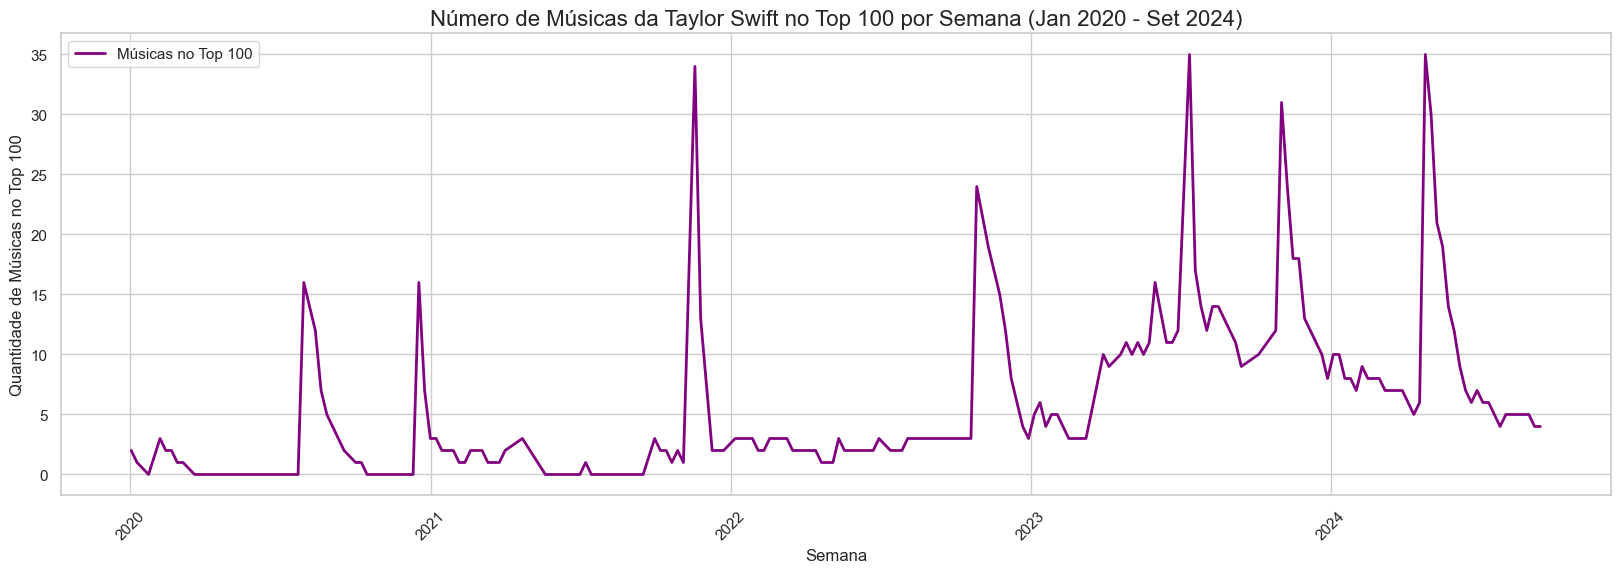

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))


sns.lineplot(x=, 
             y=, 
             data=,
             color='purple', 
             linewidth=2)


plt.title('Número de Músicas da Taylor Swift no Top 100 por Semana (Jan 2020 - Set 2024)', fontsize=16)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Quantidade de Músicas no Top 100', fontsize=12)

# Ajustando os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)
plt.legend(['Músicas no Top 100'], loc='upper left')


plt.show()

### 1.1. Decomposição dos dados

Para se conhecer novos valores em uma série temporal, é crucial conhecer os dados passados, entender quais padrões seguem ao longo do tempo; basicamente, uma série temporal pode ser composta por três principais componentes:

1. `Tendência`: Valor que causa padrões de aumento ou diminuição em uma série temporal.
2. `Sazonalidade`: Evento cíclico que ocorre por um curto período e provoca padrões de aumento ou diminuição de curto prazo na série temporal.
3. `Ruído/Resíduo`: Variações aleatórias na série temporal.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_viz = df.copy()
df_viz.index = pd.to_datetime(df_viz.week,
                              format=
                              )
df_viz = df_viz.drop(columns=['artist_name','week'])

In [ ]:
results = seasonal_decompose(df_viz,
                             period=
                             )

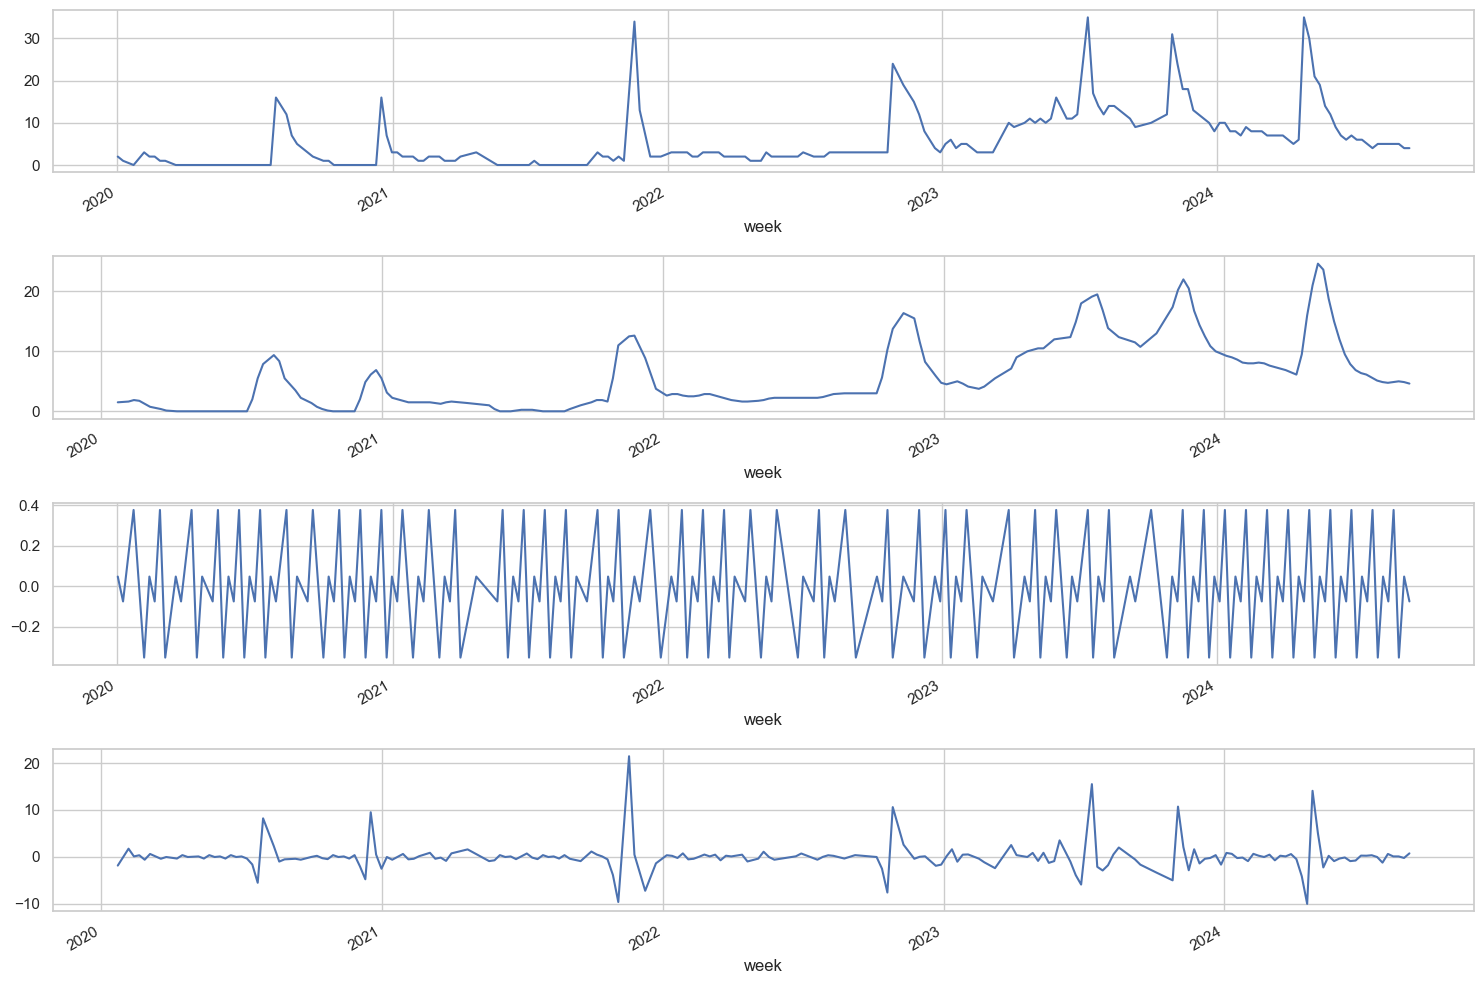

In [99]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15,10))

results.observed.plot(ax=ax1)
results.trend.plot(ax=ax2)
results.seasonal.plot(ax=ax3)
results.resid.plot(ax=ax4)

plt.tight_layout()

### 1.2. Estacionaridade

Estacionariedade significa que as características estatísticas de uma série temporal não mudam ao longo do tempo. Isso não quer dizer que a série não muda nunca, mas sim que a forma como ela muda é uma constante. Em termos de matemática, imagine que seja o seguinte: É uma função linear que se altera conforme X cresce. Mas ela tem uma inclinação que se mantém constante, porque a maneira como ela muda é constante. E por que isso é importante?

Processos estacionários são mais fáceis de analisar. Usando uma definição informal: uma vez que a maneira como mudam é previsível (constante), são processos mais previsíveis.

Fonte: __[Stationarity in time series analysis](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322#:~:text=In%20the%20most%20intuitive%20sense,not%20itself%20change%20over%20time.)__

#### 1.2.1. Teste Augmented Dickey-Fuller (ADF)

Um teste de Dickey-Fuller aumentado (ADF) é um teste estatístico para verificar se uma série temporal tem uma "raiz unitária", que pode causar resultados imprevisíveis. O teste verifica se os dados seguem uma tendência com o tempo.

- **Hipótese nula**: A série temporal não é estacionária (depende do tempo).
- **Hipótese alternativa**: A série temporal é estacionária (não depende do tempo).


Se os valores do teste ADF forem menores que os valores críticos, rejeitamos a hipótese nula e concluímos que a série é estacionária. Se forem maiores, não rejeitamos a hipótese nula e a série não é estacionária.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['song_count'])

In [101]:
print("--- Teste ADFuller --- ")
print(f"P-Value: {result[1]:.5}")
print(f"Nivel de significância: 0.05 (5%)")

print("\n")
p_value = result[1]
if p_value < 0.05:
    print("Rejeitamos a H0 (hipótese nula).")
    print("A série é estacionária!")
else:
    print("H0: Hipótese nula.")
    print("A série não é estacionária!")

--- Teste ADFuller --- 
P-Value: 4.936e-07
Nivel de significância: 0.05 (5%)


Rejeitamos a H0 (hipótese nula).
A série é estacionária!


## 2. Treino e Teste

O tratamento feito a seguir é específico para os modelos de previsão. A grande maioria dos modelos de previsão de séries temporais espera o seguinte padrão:

- `y`: coluna com os valores reais, os quais se desejam alcançar
- `ds`: coluna com o tempo
- `unique_id`: id de identificação dos valores reais

In [ ]:
df.rename(columns={: "ds",
                    : "y",
                    : "unique_id"},
                    inplace=True)

In [124]:
df.head()

,ds,y,unique_id
0,2020-01-02,2,Taylor Swift
1,2020-01-09,1,Taylor Swift
2,2020-01-23,0,Taylor Swift
3,2020-02-06,3,Taylor Swift
4,2020-02-13,2,Taylor Swift


In [ ]:
treino = 
teste = 
horizonte = 

print(f"Tamanho da base de treino: {treino.shape[0]}")
print(f"Tamanho da base de teste: {teste.shape[0]}")
print(f"Horizonte: {horizonte}")

Tamanho da base de treino: 161
Tamanho da base de teste: 37
Horizonte: 37


In [127]:
teste.head()

,ds,y,unique_id
161,2024-01-04,10,Taylor Swift
162,2024-01-11,10,Taylor Swift
163,2024-01-18,8,Taylor Swift
164,2024-01-25,8,Taylor Swift
165,2024-02-01,7,Taylor Swift


## 3. Modelagem

In [ ]:
from statsforecast import StatsForecast
from sklearn.metrics import mean_absolute_percentage_error

#### 📌 Naive Model
O modelo Naive simplesmente assume que o valor mais recente da série será o valor futuro. Ou seja, ele projeta que o próximo período terá o mesmo valor que o último observado.

📌 Exemplo: Se na última semana Taylor Swift teve 10 músicas no Top 100, o modelo prevê 10 músicas para a próxima semana.

✅ Vantagens: Extremamente rápido, útil como referência para avaliar outros modelos.

❌ Limitação: Ignora tendências e padrões sazonais.

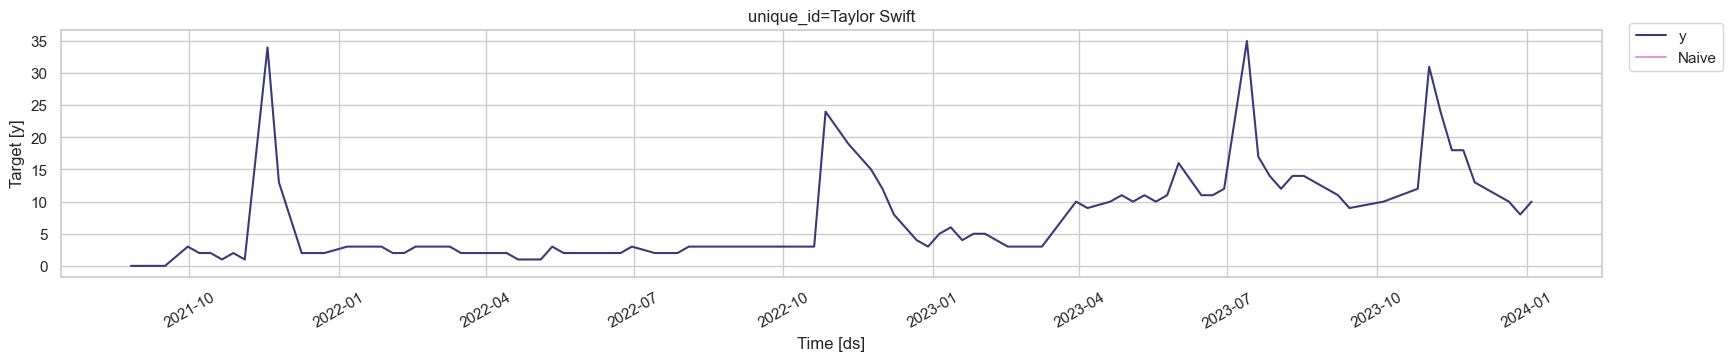

In [ ]:
from statsforecast.models import Naive

modelo_naive = StatsForecast(models=[], 
                             freq=,
                             n_jobs=)

Falando um pouco mais sobre a métrica utilizada:

- `MAPE (Erro Percentual Absoluto Médio)`: proporção da diferença média absoluta entre os valores projetados e os valores reais, dividida pelo valor real. Ele funciona melhor com dados que não possuem zeros e valores extremos, devido ao denominador. O valor do MAPE também assume um valor extremo se esse valor for extremamente pequeno ou grande. O modelo é melhor se o MAPE for baixo.

Fonte:  __[Metrics for Time Series Forecasting Models](https://analyticsindiamag.com/developers-corner/a-guide-to-different-evaluation-metrics-for-time-series-forecasting-models/)__

In [138]:
mape_modelo_naive = mean_absolute_percentage_error(valores_reais,valores_previstos)
print(f"MAPE: {mape_modelo_naive:.2%}")

MAPE: 20.00%


In [139]:
previsao_naive.head()

,unique_id,ds,Naive,y
0,Taylor Swift,2024-01-04,8.0,10


#### 🔄 SeasonalNaive Model
O SeasonalNaive é uma variação do modelo Naive que leva em conta a sazonalidade da série. Ele assume que o valor futuro será igual ao de um período equivalente no passado, repetindo padrões sazonais.

📌 Exemplo: Se, há um mês, Taylor Swift tinha 7 músicas no Top 100, o modelo prevê que daqui a um mês esse valor será 7 novamente (se a sazonalidade for mensal).

✅ Vantagens: Funciona bem para dados com padrões repetitivos.

❌ Limitação: Não consegue capturar tendências de longo prazo ou mudanças inesperadas.

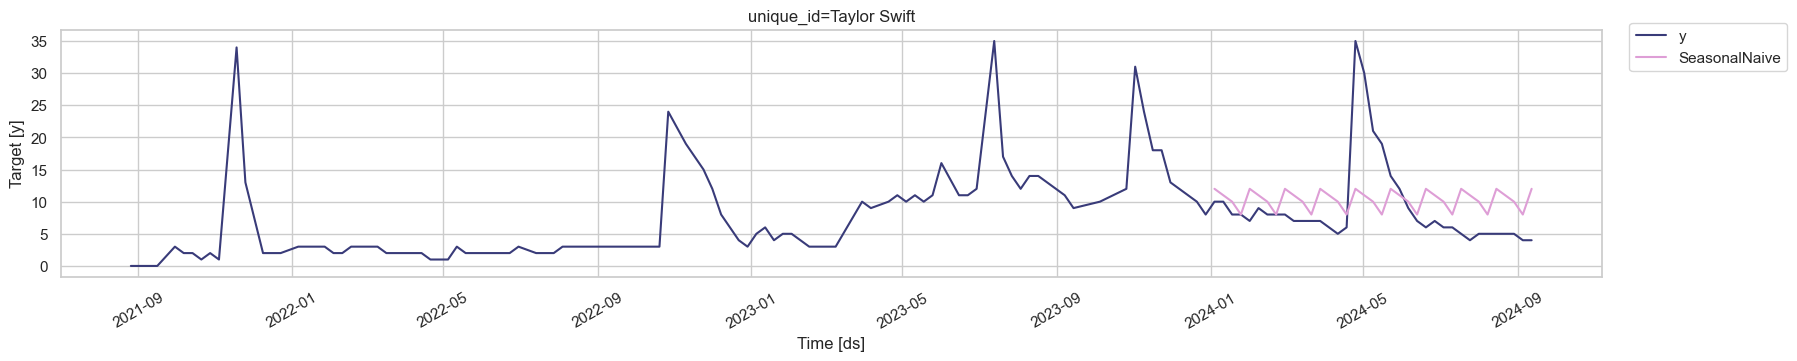

In [ ]:
from statsforecast.models import SeasonalNaive

modelo_sn = StatsForecast(models=[], 
                          freq=,
                          n_jobs=)

In [135]:
mape_modelo_naive = mean_absolute_percentage_error(valores_reais,valores_previstos)
print(f"MAPE: {mape_modelo_naive:.2%}")

MAPE: 62.31%


In [136]:
previsao_sn.head(10)

,unique_id,ds,SeasonalNaive,y
0,Taylor Swift,2024-01-04,12.0,10
1,Taylor Swift,2024-01-11,11.0,10
2,Taylor Swift,2024-01-18,10.0,8
3,Taylor Swift,2024-01-25,8.0,8
4,Taylor Swift,2024-02-01,12.0,7
5,Taylor Swift,2024-02-08,11.0,9
6,Taylor Swift,2024-02-15,10.0,8
7,Taylor Swift,2024-02-22,8.0,8
8,Taylor Swift,2024-02-29,12.0,8
9,Taylor Swift,2024-03-07,11.0,7
